In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("weight-height.csv")
df=data

In [4]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
data.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(10000, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [11]:
column=data
count=column[column==0].count()
print(count)

Gender    0
Height    0
Weight    0
dtype: int64


In [14]:
count=(data["Height"]==22).sum()
print(count)

0


In [15]:
data.isnull().head()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [17]:
x=data.iloc[:,1:6]
y=data.iloc[:,-1:]

In [18]:
x=data["Height"]
y=data["Weight"]

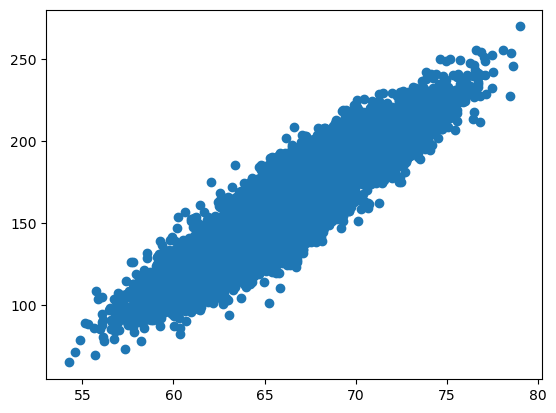

In [19]:
plt.plot(x,y,'o')

<Axes: xlabel='Height', ylabel='Weight'>

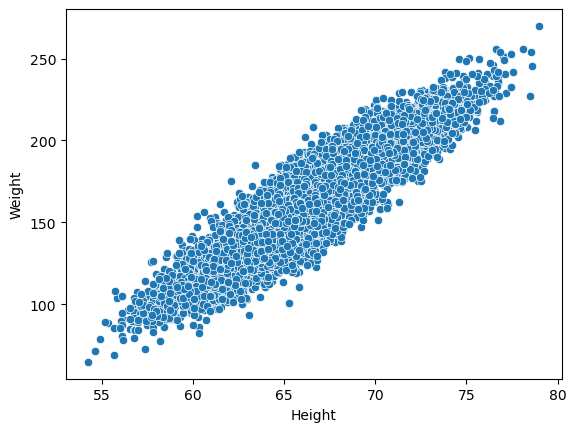

In [20]:
sns.scatterplot(x=x,y=y,data=df)

In [21]:
type(x)

pandas.core.series.Series

In [22]:
x.shape

(10000,)

In [24]:
x=x.values

In [25]:
x=x.reshape(10000,1)

In [26]:
x.shape

(10000, 1)

In [27]:
type(x)

numpy.ndarray

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(f"x training dataset:{x_train.shape}")
print(f"y training dataset:{y_train.shape}")
print(f"x test dataset : {x_test.shape}")
print(f"y test dataset :{y_test.shape}")

x training dataset:(7500, 1)
y training dataset:(7500,)
x test dataset : (2500, 1)
y test dataset :(2500,)


In [38]:
model=LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
model.coef_

array([7.70524309])

In [41]:
model.intercept_

-349.991263624618

In [43]:
y_pred=model.predict(x_test)
y_pred.shape

(2500,)

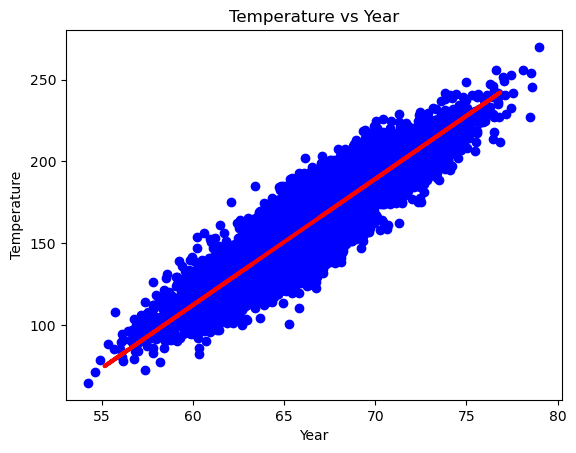

In [45]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_pred,color='red',linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

<Axes: ylabel='Weight'>

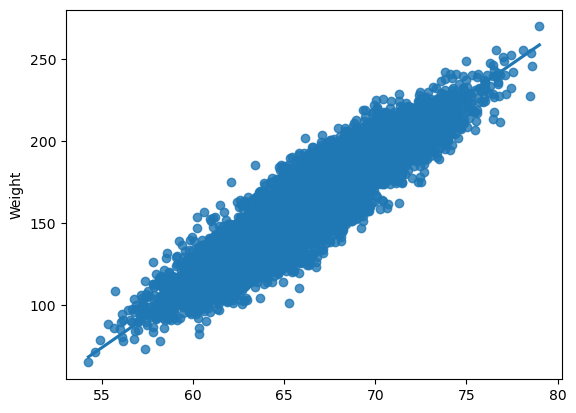

In [46]:
sns.regplot(data=df,x=x_train,y=y_train)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"R-squrae:{r2_score(y_test,y_pred)}")


MSE:148.4140889274263
MAE:9.73435226784243
R-squrae:0.8555875195750959
